In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random


In [4]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer 
#from sklearn.ensemble import RandomForestRegressor

Samples: 50
[-0.1940256786882047, 0.27699021318778755, -0.7938206327803916, -2.264896683278537]
[-0.19403017702797334, 0.27699603208676815, -0.7937631701895657, -2.2648898804152733]
[-0.13999842093398732, 0.28060777443699053, -0.18849897554105524, -0.8959233538571085]
error for MICE 8.505807347594236e-10
error for knn 0.56085857918 

Samples: 100
[1.2680988528438173, 1.331453398892757, -0.0486290939293601, 2.591239462318816]
[1.2680986902184617, 1.331453302800207, -0.048626804634040455, 2.591239614605348]
[1.2444626157647978, 1.2984170885459592, 0.047993550518422044, 1.4396901652307947]
error for MICE 1.3249362582039548e-12
error for knn 0.334262947137146 

Samples: 200
[1.3947745106362746, 1.5109880359400634, 1.18669674633479, 1.2158007377611906]
[1.3947745890366006, 1.5109880357404206, 1.186696745560456, 1.2158007907419064]
[0.7206020674803845, 1.3450331253430783, 1.3717403225653517, 1.1087028519422226]
error for MICE 2.2385517042002774e-15
error for knn 0.1319401494282809 

Samples:

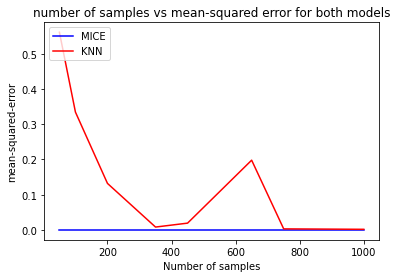

In [8]:

from sklearn.datasets import make_classification #for regression use make_regression
import random
from sklearn import metrics
import numpy as np
#to make a synthetic dataset for classfication
samples=[50,100,200,350,450,650,750,1000]
msemice=[]
mseknn=[]
for k in samples:
    print("Samples:",k)
    X,y=make_classification(n_samples=k,n_features=3,n_informative=2,n_redundant=1,random_state=42)
    l1=[]

    lx=[]
    ly=[]
    for i in range(0,4):
        tempx=random.randint(0,k-1)
        tempy=random.randint(0,2)
        lx.append(tempx)
        ly.append(tempy)
        l1.append(X[tempx][tempy])
        X[tempx][tempy]=np.NaN
    print(l1)
    
    Y=X

    #rf=RandomForestRegressor()
    lr = LinearRegression()
    imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=100, verbose=0, imputation_order='roman',random_state=0)
    X=imp.fit_transform(X)

    l2=[]
    
    for i in range(len(lx)):
        l2.append(X[lx[i]][ly[i]])
    print(l2)
    from sklearn.impute import KNNImputer
    knn = KNNImputer(n_neighbors=5)

    Y=knn.fit_transform(Y)


    l3=[]
   
    for i in range(len(lx)):
        l3.append(Y[lx[i]][ly[i]])
    print(l3)
   
    #print(A)
    from sklearn.metrics import mean_squared_error as mse
    from matplotlib import pyplot

    error1=mse(l1,l2)
    print("error for MICE",error1)
   
    msemice.append(error1)
    error2=mse(l1,l3)
    mseknn.append(error2)
    print("error for knn",error2,"\n")
pyplot.plot(samples,msemice,color="blue",label='MICE')
pyplot.plot(samples,mseknn,color="red",label='KNN')
pyplot.title("number of samples vs mean-squared error for both models")
pyplot.xlabel("Number of samples")
pyplot.ylabel("mean-squared-error")
pyplot.legend(loc ="upper left")
    